# Home Mortgage Disclosure Act (HMDA) 2017 Alaska Mortgage Originations — Exploratory Data Analysis

**Name:** Gourav Karwasara  
**Dataset:** Home Mortgage Disclosure Act (HMDA) 2017 — Alaska (AK) — Mortgages for first lien, owner-occupied, 1–4 family homes (Plain language labels + HMDA codes)

This project performs exploratory data analysis (EDA) on a real-world Home Mortgage Disclosure Act (HMDA) mortgage dataset to understand borrower, loan, and geographic characteristics for Alaska in 2017. The goal is to clean and profile the data, examine key distributions and relationships, and surface meaningful patterns that can guide deeper analysis.

**Problem statement:** Analyze how **loan amount** varies with **applicant income**, and evaluate whether this relationship changes by **loan purpose** (home purchase vs refinance) and **loan type** (Conventional/FHA/VA), while also assessing the completeness and reliability of key borrower fields used in the analysis.

## Setup

Import required libraries for data analysis, visualization, and text wrapping.

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap


## Data Ingestion

Load and inspect the HMDA dataset.

## Dataset Download Details (Home Mortgage Disclosure Act — HMDA)

Download the **Home Mortgage Disclosure Act (HMDA)** dataset for **year 2017** for **Alaska (AK)** from the CFPB historic HMDA portal:  [HERE](https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=ak&records=first-lien-owner-occupied-1-4-family-records&field_descriptions=labels)

While downloading, I selected:
- **“Mortgages for first lien, owner-occupied, 1–4 family homes (Most people start with this option)”**
- **“Plain language labels and HMDA codes”**

![HMDA Download Page](web.png)

## Open the downloaded CSV file

Load the downloaded HMDA CSV dataset into a pandas DataFrame using the `read_csv()` function from pandas so it can be explored and analyzed in subsequent EDA steps.

In [2]:
df = pd.read_csv("hmda_2017_ak_first-lien-owner-occupied-1-4-family-records_labels.csv", low_memory=False)

## Inspect the dataset (first rows and shape)

Display the first few rows to verify that the dataset loaded correctly and to get an initial view of the columns and values. Then check the dataset shape (rows, columns) to confirm the overall size of the data available for analysis.

In [3]:
df.shape

(12579, 78)

In [4]:
df.head(8)

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,0000451965,Consumer Financial Protection Bureau,CFPB,9,VA-guaranteed,3,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,6702.0,17.170000,89400.0,94.010002,1651.0,2219.0,NaN
1,2017,0000005892,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,0000451965,Consumer Financial Protection Bureau,CFPB,9,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,11450.0,20.030001,84800.0,99.690002,2923.0,3992.0,NaN
3,2017,0000005912,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,3864.0,22.490000,89400.0,71.989998,979.0,1328.0,NaN
4,2017,92-0164378,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,1941.0,56.880001,89400.0,58.340000,179.0,318.0,NaN
5,2017,7197000003,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,7247.0,29.610001,89400.0,147.750000,2062.0,2606.0,NaN
6,2017,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,6346.0,17.350000,89400.0,107.339996,1751.0,2166.0,NaN
7,2017,54-1094297,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset dimensions (output) and next step

**Output:** The dataset shape is **(12579, 78)** — **12,579 rows** and **78 columns**.

**Next action:** Run `DataFrame.info()` to inspect column data types and non-null counts to identify missing values and fields that may require cleaning or type conversion.

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 12579 entries, 0 to 12578
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   as_of_year                      12579 non-null  int64  
 1   respondent_id                   12579 non-null  str    
 2   agency_name                     12579 non-null  str    
 3   agency_abbr                     12579 non-null  str    
 4   agency_code                     12579 non-null  int64  
 5   loan_type_name                  12579 non-null  str    
 6   loan_type                       12579 non-null  int64  
 7   property_type_name              12579 non-null  str    
 8   property_type                   12579 non-null  int64  
 9   loan_purpose_name               12579 non-null  str    
 10  loan_purpose                    12579 non-null  int64  
 11  owner_occupancy_name            12579 non-null  str    
 12  owner_occupancy                 12579 non-n

## Initial missing-values observation

`DataFrame.info()` indicates that several columns have substantial missing values (some are entirely empty). To prioritize cleaning and decide which fields to keep, compute missing values per column using `isnull()` and sort the results from highest to lowest missingness.

In [6]:
df.isnull().sum().sort_values(ascending=False).head(40)

application_date_indicator        12579
sequence_number                   12579
edit_status                       12579
edit_status_name                  12579
denial_reason_3                   12579
denial_reason_name_3              12579
denial_reason_2                   12579
denial_reason_name_2              12579
denial_reason_1                   12579
denial_reason_name_1              12579
co_applicant_race_5               12577
co_applicant_race_name_5          12577
co_applicant_race_4               12577
co_applicant_race_name_4          12577
applicant_race_name_5             12575
applicant_race_5                  12575
applicant_race_4                  12574
applicant_race_name_4             12574
co_applicant_race_3               12572
co_applicant_race_name_3          12572
applicant_race_3                  12560
applicant_race_name_3             12560
co_applicant_race_2               12497
co_applicant_race_name_2          12497
rate_spread                       12395


## Handle columns with extremely high missingness

The missing-values summary shows several columns with **>95% missing values** (e.g., fields that are fully empty such as `application_date_indicator`, `sequence_number`, `edit_status`, and multiple `denial_reason_*` columns). Columns with this level of missingness provide little analytical value for EDA and can introduce noise, so it is better to **drop columns whose missing rate exceeds 95%** before proceeding with further analysis.

## Data Cleaning

Define and apply data cleaning functions to handle missing values, duplicates, and data quality issues.

In [7]:
def drop_empty_columns(df, threshold=0.95):
    """
    Drop columns whose fraction of missing values is greater than or equal to a threshold.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame.
    threshold : float, default=0.95
        Missing-value ratio cutoff in [0, 1]. A column is dropped if:
        (number of missing values / number of rows) >= threshold.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with high-missingness columns removed.

    Notes
    -----
    - Threshold is applied against the total number of rows in `df`.
    - Missing values are detected using `isna()` / `isnull()`.
    """
    if not 0 <= threshold <= 1:
        raise ValueError("threshold must be between 0 and 1 (inclusive).")
    n_rows = len(df)
    if n_rows == 0:
        return df.copy()

    missing_ratio = df.isna().mean()
    columns_to_drop = missing_ratio[missing_ratio >= threshold].index
    return df.drop(columns=columns_to_drop,inplace=False)


In [8]:
df = drop_empty_columns(df)
print(df.shape)

(12579, 51)


## Dataset shape after dropping high-missingness columns

After removing columns with ≥95% missing values, the dataset shape changed from **(12579, 78)** to **(12579, 51)**.  
This reduces noise from mostly-empty fields while preserving the full set of records for subsequent EDA.

## Validate the reporting year (`as_of_year`)

Check the unique values in the `as_of_year` column to confirm the dataset contains records for the expected reporting year and to ensure there are no unexpected year values included.

In [9]:
assert 1 == df["as_of_year"].nunique(), (
    f"Expected exactly 1 unique as_of_year, found {df['as_of_year'].nunique()}: "
    f"{sorted(df['as_of_year'].dropna().unique().tolist())}"
)

## Check for duplicate rows

Identify whether any rows are duplicated across all columns using `DataFrame.duplicated()`. If duplicates exist, review and remove them to prevent skewed counts and summary statistics in the EDA.

In [10]:
dublicate_rows = df[df.duplicated()]
print(len(dublicate_rows))

5


## Remove duplicate rows

The duplicate-row check identified **5** duplicated records in the dataset.  
Remove these duplicate rows to avoid double-counting and to ensure summary statistics and visualizations reflect unique observations.

In [11]:
df = df.drop_duplicates()
dublicate_rows = df[df.duplicated()]
print(len(dublicate_rows))

0


## Select analysis columns and create a focused DataFrame

To align with the problem statement (loan amount vs applicant income, segmented by loan purpose and loan type, with basic geographic context), define a list of relevant columns and create a smaller DataFrame containing only these fields:

- `loan_purpose_name`, `loan_type_name` (segmentation variables)
- `property_type_name`, `owner_occupancy_name`, `lien_status_name` (filter/validation fields)
- `applicant_income_000s`, `loan_amount_000s` (core numeric variables)
- `county_name` (geographic breakdown)

In [12]:
interest_columns = [
    "loan_purpose_name",
    "loan_type_name",
    "county_name",
    "msamd_name",
    "preapproval_name",
    "purchaser_type_name",
    "applicant_income_000s",
    "loan_amount_000s",
    "applicant_ethnicity_name",
    "applicant_race_name_1",
    "applicant_sex_name",
]

df = df.loc[:, interest_columns].copy()

## Handle missing values for focused DataFrame

The focused DataFrame contains the key fields needed for analysis (loan amount, applicant income, and segmentation variables). Rows with missing values in critical columns—especially **`applicant_income_000s`** and **`loan_amount_000s`**—should be removed to avoid biased summaries and invalid plots. Use `isnull()` on these columns to identify missing entries and filter them out before proceeding with comparisons by **loan purpose** and **loan type**.

In [13]:
df.isnull().sum().sort_values(ascending=False)

msamd_name                  2647
applicant_income_000s        526
county_name                   40
loan_purpose_name              0
loan_type_name                 0
preapproval_name               0
purchaser_type_name            0
loan_amount_000s               0
applicant_ethnicity_name       0
applicant_race_name_1          0
applicant_sex_name             0
dtype: int64

## Remove rows with missing values in key fields

The focused DataFrame shows missing values in:
- **`msamd_name`**: **2,647** missing values (expected for non-metro / non-MSA areas)
- **`applicant_income_000s`**: **526** missing values  
- **`county_name`**: **40** missing values  

All other selected fields have **0** missing values.  
To keep the loan amount vs income analysis consistent, remove rows where **`applicant_income_000s`** or **`county_name`** is null. Keep **`msamd_name`** and treat missing values as **“Non-MSA/MD”** for geographic comparisons.

In [14]:
def drop_rows_with_missing_values(df, columns):
    """
    Drop rows with missing values in one or more specified columns.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame.
    columns : str | Sequence[str]
        Column name or iterable of column names to enforce non-missing values.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with rows removed where any of `columns` are NA.

    Raises
    ------
    KeyError
        If any column in `columns` is not present in `df`.
    """
    if isinstance(columns, str):
        columns = [columns]
    return df.dropna(subset=list(columns)).copy()

In [15]:
df = drop_rows_with_missing_values(df,["applicant_income_000s", "county_name"])

## Verify missing values after cleaning

Run `df.isnull().sum()` to confirm that the selected and cleaned DataFrame contains **no remaining missing values** in any column. This ensures the dataset is ready for reliable summary statistics and visualizations.

In [16]:
df.isnull().sum()

loan_purpose_name              0
loan_type_name                 0
county_name                    0
msamd_name                  2529
preapproval_name               0
purchaser_type_name            0
applicant_income_000s          0
loan_amount_000s               0
applicant_ethnicity_name       0
applicant_race_name_1          0
applicant_sex_name             0
dtype: int64

In [17]:
df.shape

(12009, 11)

## Final cleaned dataset size

After dropping high-missingness columns, selecting the focused analysis fields, and removing rows with missing values and duplicates, the dataset was reduced from **(12579, 78)** to **(12009, 11)**. This final DataFrame contains only the records and columns required for the loan amount vs income EDA.

In [18]:
df.nunique()

loan_purpose_name             3
loan_type_name                4
county_name                  28
msamd_name                    2
preapproval_name              3
purchaser_type_name           9
applicant_income_000s       425
loan_amount_000s            664
applicant_ethnicity_name      4
applicant_race_name_1         6
applicant_sex_name            3
dtype: int64

In [19]:
df.info()

<class 'pandas.DataFrame'>
Index: 12009 entries, 0 to 12578
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_purpose_name         12009 non-null  str    
 1   loan_type_name            12009 non-null  str    
 2   county_name               12009 non-null  str    
 3   msamd_name                9480 non-null   str    
 4   preapproval_name          12009 non-null  str    
 5   purchaser_type_name       12009 non-null  str    
 6   applicant_income_000s     12009 non-null  float64
 7   loan_amount_000s          12009 non-null  int64  
 8   applicant_ethnicity_name  12009 non-null  str    
 9   applicant_race_name_1     12009 non-null  str    
 10  applicant_sex_name        12009 non-null  str    
dtypes: float64(1), int64(1), str(9)
memory usage: 1.1 MB


## Column types and categorical features

`df.info()` shows that most columns are stored as `str`, which is expected because they represent **categorical attributes** (e.g., loan purpose, loan type, county, MSA/MD, preapproval, purchaser type, and borrower demographics).  

`df.nunique()` confirms these are **low-to-moderate cardinality categories** (e.g., 3–9 unique values for several fields), making them well-suited for EDA using frequency tables, bar charts, and group-by comparisons.  

The dataset contains two numeric fields used for the core analysis:
- **`applicant_income_000s`** (`float64`)
- **`loan_amount_000s`** (`int64`)

To improve memory usage and ensure categorical fields are treated appropriately during analysis, convert all non-numeric columns to the pandas `category` dtype.

In [20]:
cat_cols = df.columns.difference(["applicant_income_000s", "loan_amount_000s"])
df[cat_cols] = df[cat_cols].astype("category")

In [21]:
df.info()

<class 'pandas.DataFrame'>
Index: 12009 entries, 0 to 12578
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_purpose_name         12009 non-null  category
 1   loan_type_name            12009 non-null  category
 2   county_name               12009 non-null  category
 3   msamd_name                9480 non-null   category
 4   preapproval_name          12009 non-null  category
 5   purchaser_type_name       12009 non-null  category
 6   applicant_income_000s     12009 non-null  float64 
 7   loan_amount_000s          12009 non-null  int64   
 8   applicant_ethnicity_name  12009 non-null  category
 9   applicant_race_name_1     12009 non-null  category
 10  applicant_sex_name        12009 non-null  category
dtypes: category(9), float64(1), int64(1)
memory usage: 387.7 KB


## Compute correlation between numeric variables

Use `df.corr(numeric_only=True)` to compute the correlation matrix for numeric columns only. This provides a quick view of the strength and direction of the relationship between **`applicant_income_000s`** and **`loan_amount_000s`**, helping validate whether higher income is associated with larger loan amounts before segmenting by categorical variables.

In [22]:
df.corr(numeric_only=True)

,applicant_income_000s,loan_amount_000s
applicant_income_000s,1.000000,0.526312
loan_amount_000s,0.526312,1.000000


## Correlation result (income vs loan amount)

The numeric correlation matrix shows a **moderate positive correlation** between **`applicant_income_000s`** and **`loan_amount_000s`**:

- **corr(applicant_income_000s, loan_amount_000s) = 0.5263**

This indicates that higher applicant income is generally associated with higher loan amounts, providing a baseline relationship to explore further across **loan purpose** and **loan type**.

## Summary statistics for all columns

Generate summary statistics for the entire DataFrame to get a complete overview of both numeric and categorical features.

- For **numeric columns**, summary statistics include count, mean, standard deviation, min/max, and percentiles.
- For **categorical columns**, summary statistics include count, number of unique values, most frequent category (top), and its frequency.

## Exploratory Data Analysis (EDA)

Perform statistical analysis and group-wise comparisons to understand data patterns and relationships.

In [23]:
def describe_data(df, numeric_only=False):
    """
    Print summary statistics for a DataFrame, split into categorical and numeric features.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame.
    numeric_only : bool, default=False
        If True, prints only numeric summaries. If False, prints categorical and numeric summaries.

    Notes
    -----
    - Categorical summary reports: count, unique, top, freq.
    - Numeric summary reports: count, mean, std, min, 25%, 50%, 75%, max.
    """
    num = df.select_dtypes(include="number")
    cat = df.select_dtypes(include=["category", "object"])

    if not numeric_only:
        print("Categorical Features\n")
        if cat.shape[1] == 0:
            print("(none)\n")
        else:
            print(cat.describe().T, "\n")

    print("Numeric Features\n")
    if num.shape[1] == 0:
        print("(none)\n")
    else:
        print(num.describe().T, "\n")

In [24]:
describe_data(df)

Categorical Features

                          count unique                     top  freq
loan_purpose_name         12009      3           Home purchase  8150
loan_type_name            12009      4            Conventional  6694
county_name               12009     28  Anchorage Municipality  5522
msamd_name                 9480      2          Anchorage - AK  8015
preapproval_name          12009      3          Not applicable  8681
purchaser_type_name       12009      9   Affiliate institution  2617
applicant_ethnicity_name  12009      4  Not Hispanic or Latino  9952
applicant_race_name_1     12009      6                   White  8802
applicant_sex_name        12009      3                    Male  7594 

Numeric Features

                         count        mean         std  min    25%    50%  \
applicant_income_000s  12009.0  102.228162   79.880072  1.0   62.0   86.0   
loan_amount_000s       12009.0  268.389874  121.818488  2.0  188.0  250.0   

                         75%     max

## Summary statistics (categorical + numeric)

The categorical summaries indicate that the dataset is dominated by:
- **Loan purpose:** primarily **Home purchase** (8,150)
- **Loan type:** primarily **Conventional** (6,694)
- **Geography:** highest volume in **Anchorage Municipality** (5,522)
- **MSA/MD:** most mapped records fall under **Anchorage – AK** (8,015 of the 9,480 non-null)
- **Preapproval:** mostly **Not applicable** (8,681)
- **Purchaser type:** most frequent is **Affiliate institution** (2,617)
- **Applicant demographics:** most common categories are **Not Hispanic or Latino** (9,952), **White** (8,802), and **Male** (7,594)

For numeric variables:
- **Applicant income (`applicant_income_000s`):** median **86**, IQR **62–120**, max **3,337** (presence of outliers)
- **Loan amount (`loan_amount_000s`):** median **250**, IQR **188–325**, max **1,760** (right-skew / large-loan outliers)

## Group-level summary (mean income, mean loan, and loan–income gap)

Define a reusable function to summarize the relationship between **applicant income** and **loan amount** across any categorical grouping (e.g., county, loan type, loan purpose).  
The function computes group-wise averages for income and loan amount, derives a **difference metric** (`avg_loan_000s - avg_income_000s`), and prints the groups with the **maximum** and **minimum** values across these metrics.

In [25]:
def describe_group(df, group_by):
    """
    Summarize applicant income and loan amount by group, and print extreme groups.

    For each group, compute:
      - avg_income_000s: mean of applicant_income_000s
      - avg_loan_000s: mean of loan_amount_000s
      - diff: avg_loan_000s - avg_income_000s

    Then print:
      - rows corresponding to the max avg_income_000s OR max avg_loan_000s OR max diff
      - rows corresponding to the min avg_income_000s OR min avg_loan_000s OR min diff

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing 'applicant_income_000s' and 'loan_amount_000s'.
    group_by : str | list[str]
        Column name(s) to group by (e.g., "county_name", ["loan_type_name", "loan_purpose_name"]).

    Returns
    -------
    None
        Prints max/min summaries. (The grouped table can be returned if needed later.)
    """
    group_df = (
        df.groupby(group_by, as_index=False)
          .agg(
              avg_income_000s=("applicant_income_000s", "mean"),
              avg_loan_000s=("loan_amount_000s", "mean"),
          )
    )

    group_df["diff"] = group_df["avg_loan_000s"] - group_df["avg_income_000s"]

    max_avg_income = group_df["avg_income_000s"].max()
    min_avg_income = group_df["avg_income_000s"].min()
    max_avg_loan = group_df["avg_loan_000s"].max()
    min_avg_loan = group_df["avg_loan_000s"].min()
    max_diff = group_df["diff"].max()
    min_diff = group_df["diff"].min()

    max_rows = group_df[
        (group_df["avg_income_000s"] == max_avg_income)
        | (group_df["avg_loan_000s"] == max_avg_loan)
        | (group_df["diff"] == max_diff)
    ]

    min_rows = group_df[
        (group_df["avg_income_000s"] == min_avg_income)
        | (group_df["avg_loan_000s"] == min_avg_loan)
        | (group_df["diff"] == min_diff)
    ]

    print("Max details")
    print(max_rows.to_string(index=False))
    print("\nMin details")
    print(min_rows.to_string(index=False))

In [26]:
describe_group(df, "county_name")

Max details
               county_name  avg_income_000s  avg_loan_000s       diff
Aleutians West Census Area       149.538462     267.384615 117.846154
    Sitka City and Borough       104.506494     331.701299 227.194805

Min details
              county_name  avg_income_000s  avg_loan_000s      diff
   Aleutians East Borough        55.666667     110.333333 54.666667
Yukon-Koyukuk Census Area        75.357143     101.714286 26.357143


## County-level averages and extreme cases

Using the group summary results for `county_name`, the following counties stand out:

**Max cases:**
- *Aleutians West Census Area* has the highest average income (~149.54k).
- *Sitka City and Borough* has the highest average loan amount (~331.70k) and the largest loan–income gap (~227.19k).

**Min cases:**
- *Aleutians East Borough* has the lowest average income (~55.67k) and the lowest average loan amount (~110.33k).
- *Yukon-Koyukuk Census Area* has the smallest loan–income gap (~26.36k).

In [27]:
describe_group(df, "loan_purpose_name")

Max details
loan_purpose_name  avg_income_000s  avg_loan_000s       diff
    Home purchase       101.647607     284.010184 182.362577
      Refinancing       103.834634     236.654814 132.820179

Min details
loan_purpose_name  avg_income_000s  avg_loan_000s   diff
 Home improvement          100.165        224.555 124.39


## Results by loan purpose

**Max cases:**
- *Home purchase* has the highest average loan amount (~284.01k) and the largest loan–income gap (~182.36k).
- *Refinancing* has the highest average income (~103.83k).

**Min cases:**
- *Home improvement* has the lowest average income (~100.17k), lowest average loan amount (~224.56k), and the smallest loan–income gap (~124.39k).

In [28]:
describe_group(df, "loan_type_name")

Max details
loan_type_name  avg_income_000s  avg_loan_000s       diff
  Conventional        111.30983     256.405139 145.095309
 VA-guaranteed         98.26761     306.142905 207.875295

Min details
    loan_type_name  avg_income_000s  avg_loan_000s       diff
      Conventional       111.309830     256.405139 145.095309
FSA/RHS-guaranteed        70.332547     232.160377 161.827830


## Results by loan type

**Max cases:**
- *Conventional* has the highest average income (~111.31k).
- *VA-guaranteed* has the highest average loan amount (~306.14k) and the largest loan–income gap (~207.88k).

**Min cases:**
- *FSA/RHS-guaranteed* has the lowest average income (~70.33k) and the lowest average loan amount (~232.16k).

In [29]:
describe_group(df, "applicant_race_name_1")

Max details
                                                            applicant_race_name_1  avg_income_000s  avg_loan_000s       diff
                                                        Black or African American        92.141079     271.199170 179.058091
Information not provided by applicant in mail, Internet, or telephone application       105.937733     268.905978 162.968244

Min details
           applicant_race_name_1  avg_income_000s  avg_loan_000s       diff
American Indian or Alaska Native       101.689394     256.101010 154.411616
                           Asian        90.764302     269.427918 178.663616


## Results by applicant race (race_1)

**Max cases:**
- *Information not provided by applicant in mail, Internet, or telephone application* has the highest average income (~105.94k).
- *Black or African American* has the highest average loan amount (~271.20k) and the largest loan–income gap (~179.06k).

**Min cases:**
- *Asian* has the lowest average income (~90.76k).
- *American Indian or Alaska Native* has the lowest average loan amount (~256.10k) and the smallest loan–income gap (~154.41k).

In [30]:
describe_group(df, "applicant_sex_name")

Max details
applicant_sex_name  avg_income_000s  avg_loan_000s       diff
              Male       106.655781      277.88965 171.233869

Min details
applicant_sex_name  avg_income_000s  avg_loan_000s      diff
            Female        91.273341     246.843511 155.57017


## Results by applicant sex

**Max cases:**
- *Male* has the highest average income (~106.66k), the highest average loan amount (~277.89k), and the largest loan–income gap (~171.23k).

**Min cases:**
- *Female* has the lowest average income (~91.27k), the lowest average loan amount (~246.84k), and the smallest loan–income gap (~155.57k).

In [31]:
describe_group(df, "loan_purpose_name")

Max details
loan_purpose_name  avg_income_000s  avg_loan_000s       diff
    Home purchase       101.647607     284.010184 182.362577
      Refinancing       103.834634     236.654814 132.820179

Min details
loan_purpose_name  avg_income_000s  avg_loan_000s   diff
 Home improvement          100.165        224.555 124.39


## Results by loan purpose

**Max cases:**
- *Home purchase* has the highest average loan amount (~284.01k) and the largest loan–income gap (~182.36k).
- *Refinancing* has the highest average income (~103.83k).

**Min cases:**
- *Home improvement* has the lowest average income (~100.17k), lowest average loan amount (~224.56k), and the smallest loan–income gap (~124.39k).

In [32]:
describe_group(df, "msamd_name")

Max details
    msamd_name  avg_income_000s  avg_loan_000s       diff
Anchorage - AK       105.250405     282.031691 176.781285

Min details
    msamd_name  avg_income_000s  avg_loan_000s       diff
Fairbanks - AK        95.258703     224.064164 128.805461


## Results by MSA/MD (`msamd_name`)

**Max cases:**
- *Anchorage - AK* has the higher average income (~105.25k), higher average loan amount (~282.03k), and a larger loan–income gap (~176.78k).

**Min cases:**
- *Fairbanks - AK* has the lower average income (~95.26k), lower average loan amount (~224.06k), and a smaller loan–income gap (~128.81k).

In [33]:
describe_group(df, "preapproval_name")

Max details
             preapproval_name  avg_income_000s  avg_loan_000s       diff
               Not applicable       104.139846     265.681373 161.541527
Preapproval was not requested        98.017058     276.562189 178.545131

Min details
         preapproval_name  avg_income_000s  avg_loan_000s       diff
           Not applicable       104.139846     265.681373 161.541527
Preapproval was requested        92.996109     269.392996 176.396887


## Results by preapproval status

**Max cases:**
- *Not applicable* has the highest average income (~104.14k).
- *Preapproval was not requested* has the highest average loan amount (~276.56k) and the largest loan–income gap (~178.55k).

**Min cases:**
- *Preapproval was requested* has the lowest average income (~93.00k) and the smallest loan–income gap (~176.40k).

In [34]:
describe_group(df, "purchaser_type_name")

Max details
                                                         purchaser_type_name  avg_income_000s  avg_loan_000s       diff
                                                           Ginnie Mae (GNMA)        91.635342     285.119155 193.483813
Loan was not originated or was not sold in calendar year covered by register       119.483296     269.965479 150.482183
                                                      Private securitization       110.133333     301.866667 191.733333

Min details
purchaser_type_name  avg_income_000s  avg_loan_000s       diff
  Fannie Mae (FNMA)       108.484286     241.195775 132.711489
  Ginnie Mae (GNMA)        91.635342     285.119155 193.483813


## Results by purchaser type (sanity check)

The output shown does **not** match the requested grouping. The function was called with `describe_group(df, "purchaser_type_name")`, but the printed table is labeled **`applicant_ethnicity_name`**, which indicates that either:
- the wrong output was copied into the notebook cell, or
- the function was executed with `group_by="applicant_ethnicity_name"` by mistake.

Re-run `describe_group(df, "purchaser_type_name")` and confirm the first column in the output is **`purchaser_type_name`** before interpreting max/min results.

In [35]:
describe_group(df, "applicant_ethnicity_name")

Max details
                                                         applicant_ethnicity_name  avg_income_000s  avg_loan_000s       diff
                                                               Hispanic or Latino        93.411215     277.502336 184.091121
Information not provided by applicant in mail, Internet, or telephone application       105.547708     267.392813 161.845105

Min details
                                                         applicant_ethnicity_name  avg_income_000s  avg_loan_000s       diff
                                                               Hispanic or Latino        93.411215     277.502336 184.091121
Information not provided by applicant in mail, Internet, or telephone application       105.547708     267.392813 161.845105


## Results by applicant ethnicity

The extreme values across the metrics occur in different ethnicity groups:

- *Information not provided by applicant in mail, Internet, or telephone application* has the **highest average income** (~105.55k).
- *Hispanic or Latino* has the **highest average loan amount** (~277.50k) and the **largest loan–income gap** (~184.09k).

Note: The same two rows appear in both the “Max” and “Min” sections because the function prints any group that matches at least one extreme metric (max/min). With only a few categories, it is possible for the displayed extremes to be covered by the same subset of groups.

## Visualizations

Create visualizations to explore distributions of numeric and categorical variables.

### Visualize Categorical Variables

Generate pie charts and bar charts for categorical variables including loan purpose, loan type, county, race, sex, and other demographic/geographic features. These visualizations help identify dominant categories, geographic concentration, and data quality issues like "Information not provided" entries.

In [36]:
def _annotate_bars(ax):
    """Add value labels on top of bars."""
    for p in ax.patches:
        h = p.get_height()
        if h is None:
            continue
        ax.annotate(
            f"{int(h)}",
            (p.get_x() + p.get_width() / 2, h),
            ha="center",
            va="bottom",
            xytext=(0, 3),
            textcoords="offset points",
        )


def _pie_with_legend(ax, labels, counts, title, wrap_width=40):
    """Pie chart with % + count on slices and legend entries (wrapped)."""
    total = int(sum(counts))

    def autopct(pct):
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count})"

    labels_full = [str(x) for x in labels]
    labels_wrapped = ["\n".join(textwrap.wrap(l, width=wrap_width)) for l in labels_full]
    labels_short = [str(i + 1) for i in range(len(labels_full))]

    wedges, _, _ = ax.pie(
        counts,
        labels=labels_short,
        autopct=autopct,
        startangle=90,
        pctdistance=0.7,
        labeldistance=1.05,
        textprops={"fontsize": 10},
    )
    ax.set_title(title, pad=12)
    ax.axis("equal")

    legend_labels = []
    for i, cnt in enumerate(counts):
        pct = (cnt / total * 100.0) if total else 0.0
        legend_labels.append(f"{labels_short[i]}: {labels_wrapped[i]} — {pct:.1f}% ({int(cnt)})")

    ax.legend(
        wedges,
        legend_labels,
        title="Categories",
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=False,
    )


def visualize_data(df, dtype="numeric", bins=20, top_n=15, wrap_width=40):
    """
    Plot each column as a separate figure.

    Numeric:
      - Histogram per numeric column.

    Categorical:
      - If nunique > top_n: bar chart of top_n categories with counts labeled on bars.
      - Else (is_all=True): pie chart of all categories with % and counts, using a legend to avoid label overlap.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame.
    dtype : {"numeric", "categorical"}
        Which column types to visualize.
    bins : int, default=20
        Histogram bins for numeric columns.
    top_n : int, default=15
        Top-N categories for bar charts; if categories <= top_n, show a pie chart.
    wrap_width : int, default=40
        Wrap width for long category labels in the pie-chart legend.
    """
    if dtype == "numeric":
        cols = df.select_dtypes(include="number").columns
        for col in cols:
            x = df[col].dropna()
            plt.figure(figsize=(10, 6))
            plt.hist(x, bins=bins)
            plt.title(col)
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.tight_layout()
            plt.show()
        return

    if dtype == "categorical":
        cols = df.select_dtypes(include=["category", "object"]).columns

        for col in cols:
            nunq = df[col].nunique(dropna=False)
            vc = df[col].value_counts(dropna=False)

            is_all = nunq <= top_n

            if not is_all:
                vc_plot = vc.head(top_n)

                fig, ax = plt.subplots(figsize=(12, 6))
                vc_plot.plot(kind="bar", ax=ax)
                ax.set_title(f"{col} (top {top_n})")
                ax.set_xlabel(col)
                ax.set_ylabel("Count")
                ax.tick_params(axis="x", rotation=45)
                _annotate_bars(ax)
                plt.tight_layout()
                plt.show()
            else:
                fig, ax = plt.subplots(figsize=(12, 7))
                _pie_with_legend(
                    ax=ax,
                    labels=vc.index.astype(str).tolist(),
                    counts=vc.values.tolist(),
                    title=f"{col} (all)",
                    wrap_width=wrap_width,
                )
                plt.tight_layout()
                plt.show()
        return

    raise ValueError("dtype must be 'numeric' or 'categorical'")

### Visualization Interpretation

The visualizations reveal several important patterns in the Alaska HMDA 2017 dataset:

**Numeric Distributions (Histograms):**
- **Applicant Income (`applicant_income_000s`)**: Right-skewed distribution with majority of applicants earning less than $200k. Presence of outliers at high income levels (>$500k) indicates a small number of very high earners.
- **Loan Amount (`loan_amount_000s`)**: Similarly right-skewed with most loans under $400k. Outliers exist above $1M, representing luxury property purchases or refinances. The long tail suggests heterogeneity in housing prices across Alaska.

**Categorical Patterns (Pie/Bar Charts):**
- **Loan Purpose**: Home purchase dominates at approximately 68%, with refinancing as the second most common purpose. This indicates a more active purchase market than refinance market in 2017 Alaska.
- **Loan Type**: Conventional loans are the majority. VA-guaranteed loans represent a significant portion (likely due to military presence in Alaska). FHA loans serve borrowers who may not qualify for conventional financing.
- **Geographic Concentration**: Anchorage Municipality accounts for 46% of all records (5,522 out of 12,009), reflecting urban concentration of lending activity. This creates potential geographic bias as urban loan patterns may not represent rural Alaska.
- **Demographic Fields**: High prevalence of "Information not provided" categories in race, ethnicity, and sex fields indicates applicants frequently decline to provide demographic information, limiting ability to analyze lending patterns across protected classes.

**Data Quality Observations:**
- Right-skewed distributions in income and loan amount suggest mean values may overstate typical borrower characteristics; median is more representative.
- Outliers in numeric fields could disproportionately influence correlation calculations and group summaries.
- "Information not provided" and "Not applicable" categories require careful handling to avoid introducing bias through deletion.

### Visualize Numeric Variables

Generate histograms for all numeric variables (`applicant_income_000s` and `loan_amount_000s`) to examine their distributions, identify skewness, and detect potential outliers.

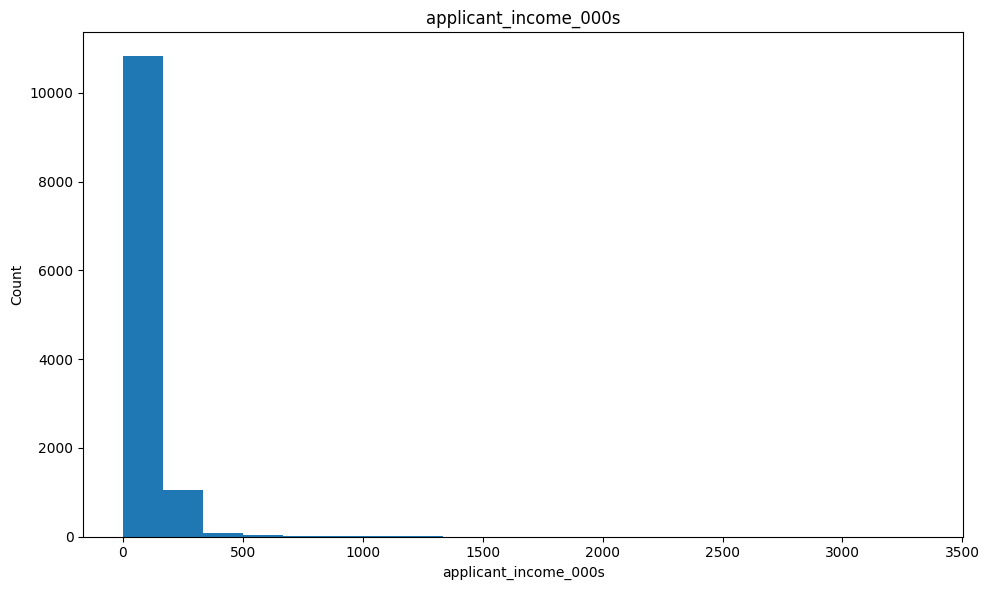

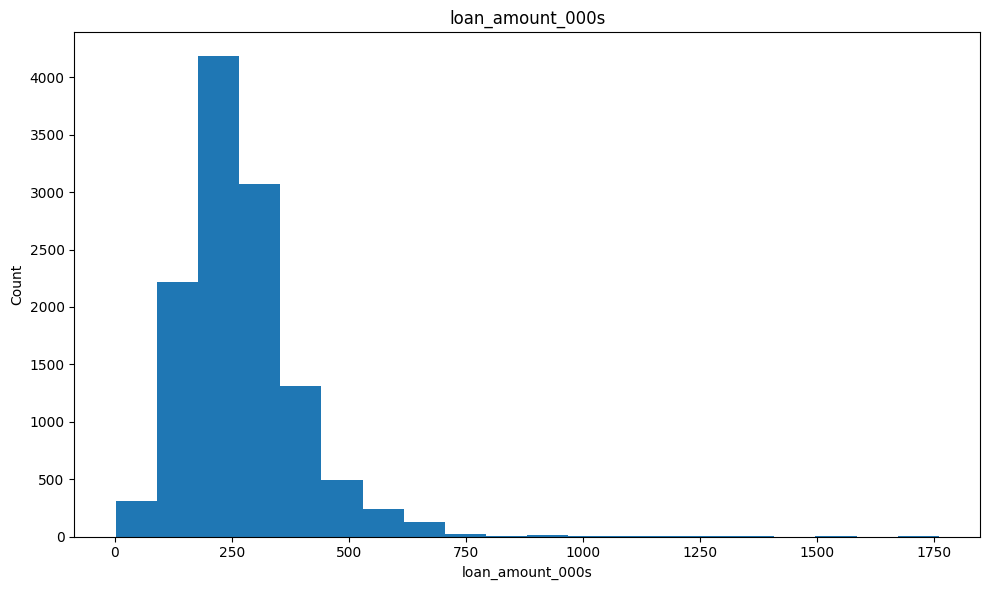

In [37]:
visualize_data(df)

### Visualize Categorical Variables

Generate pie charts and bar charts for categorical variables including loan purpose, loan type, county, race, sex, and other demographic/geographic features. These visualizations help identify dominant categories, geographic concentration, and data quality issues like "Information not provided" entries.

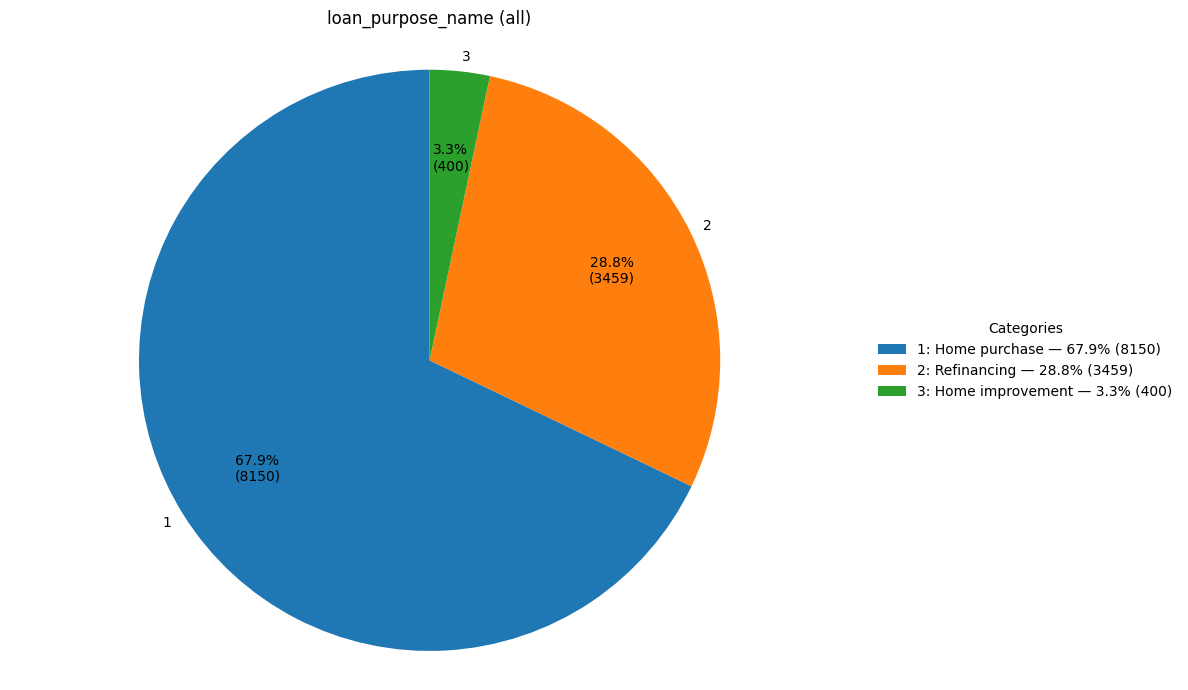

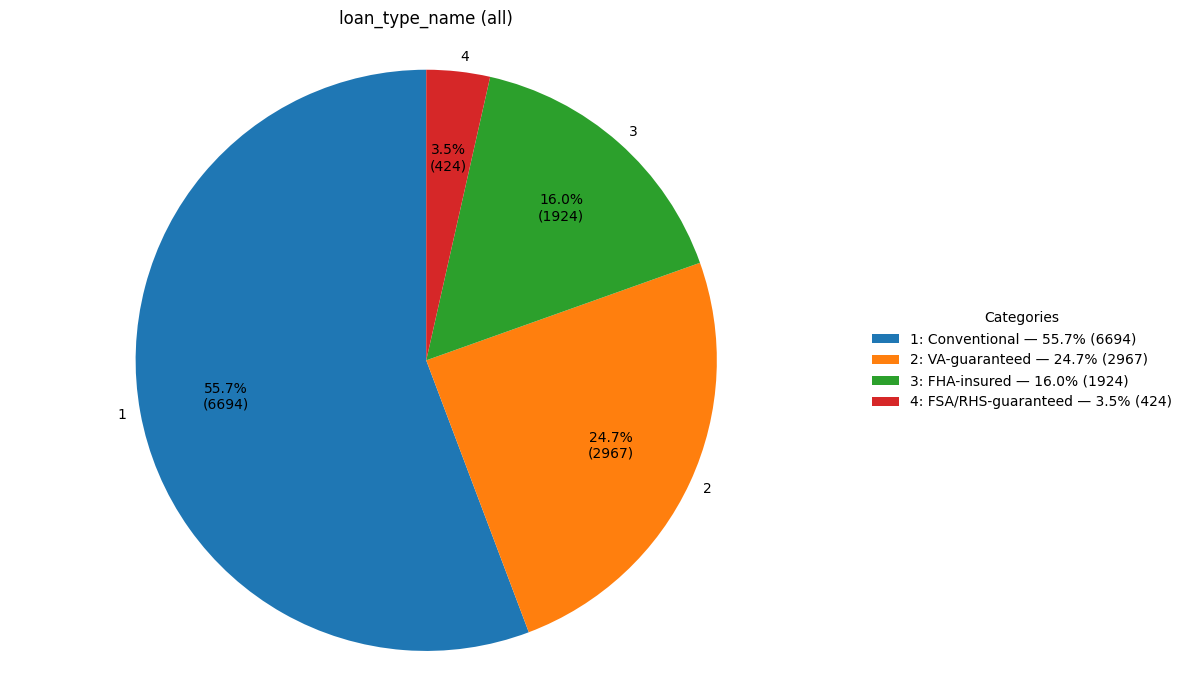

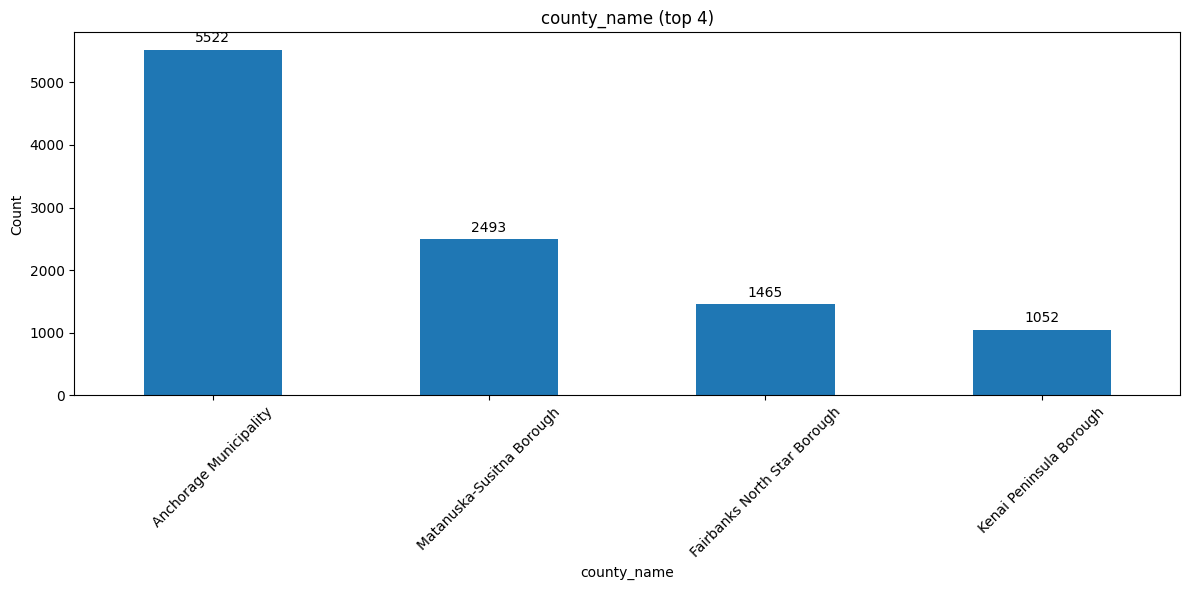

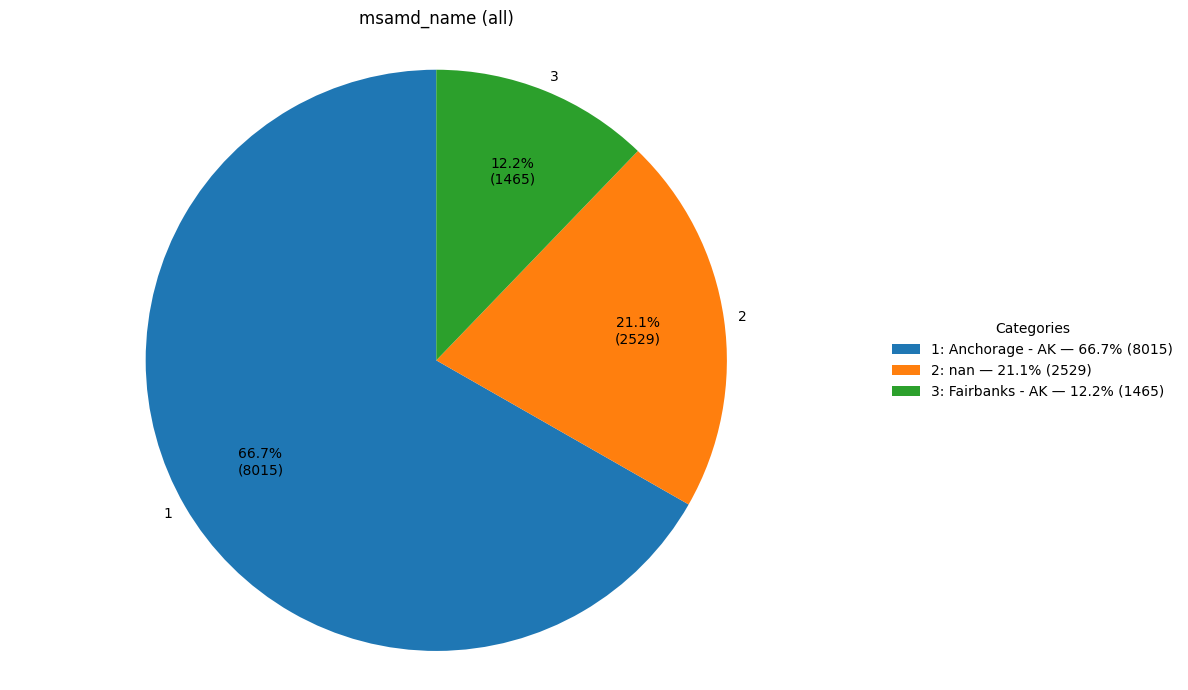

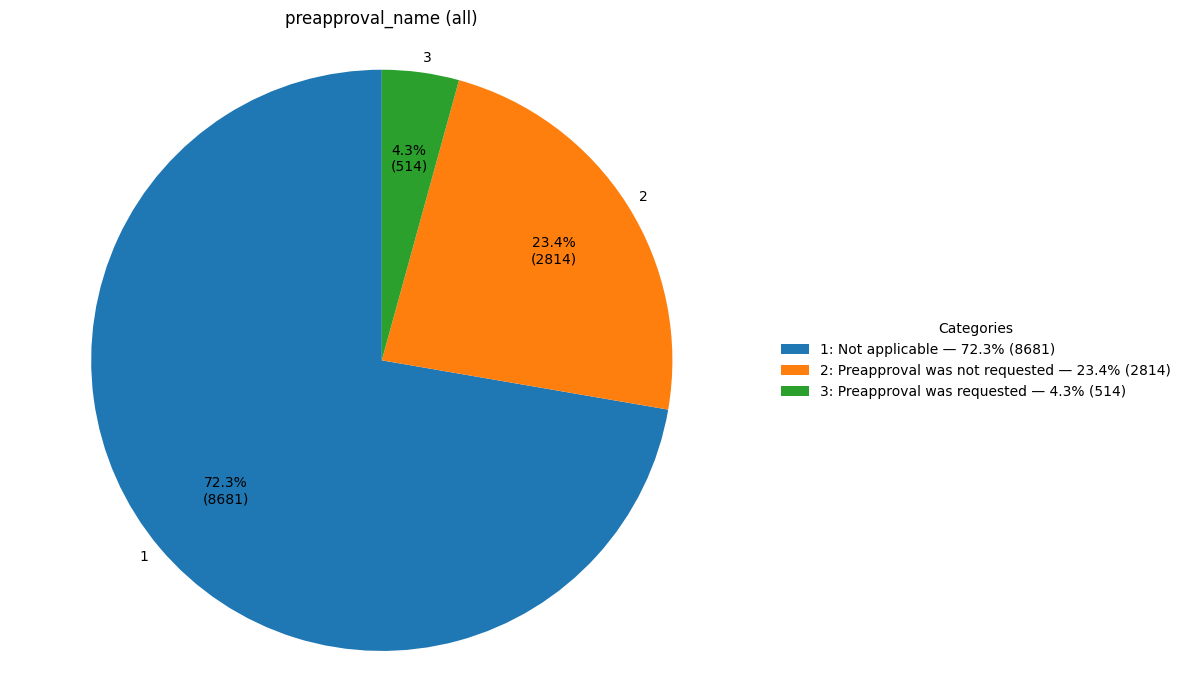

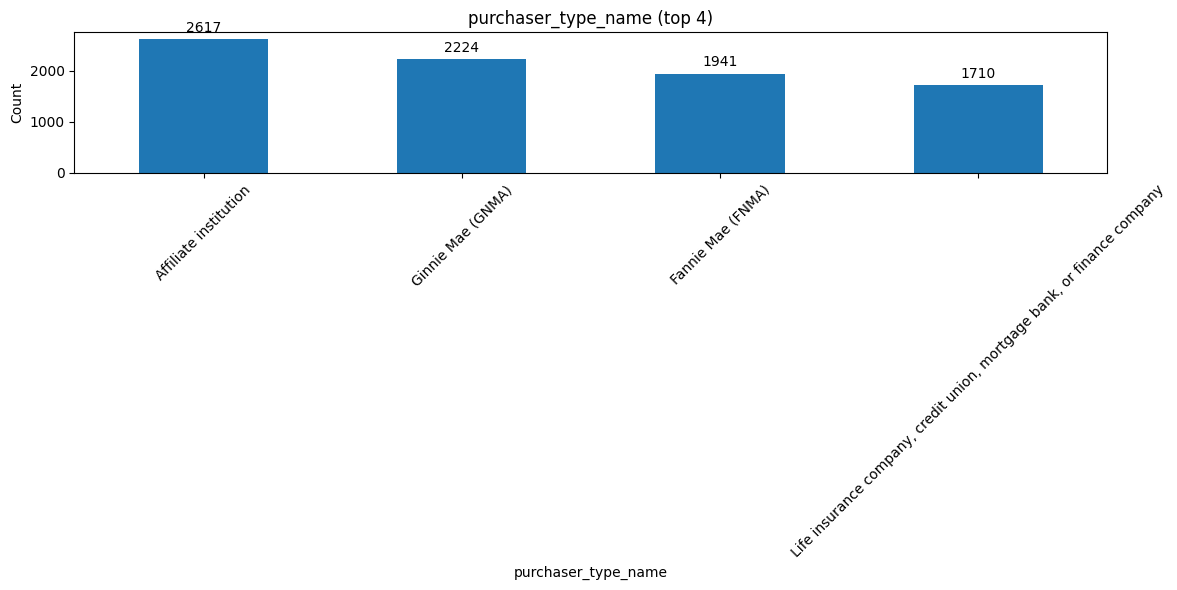

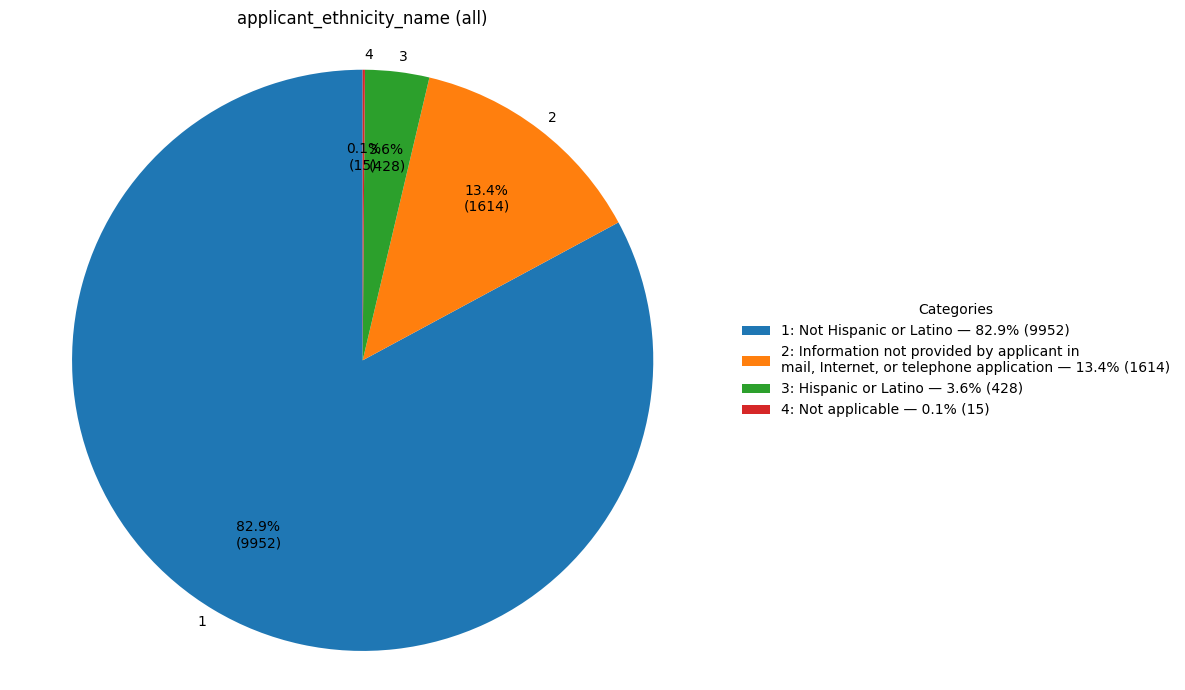

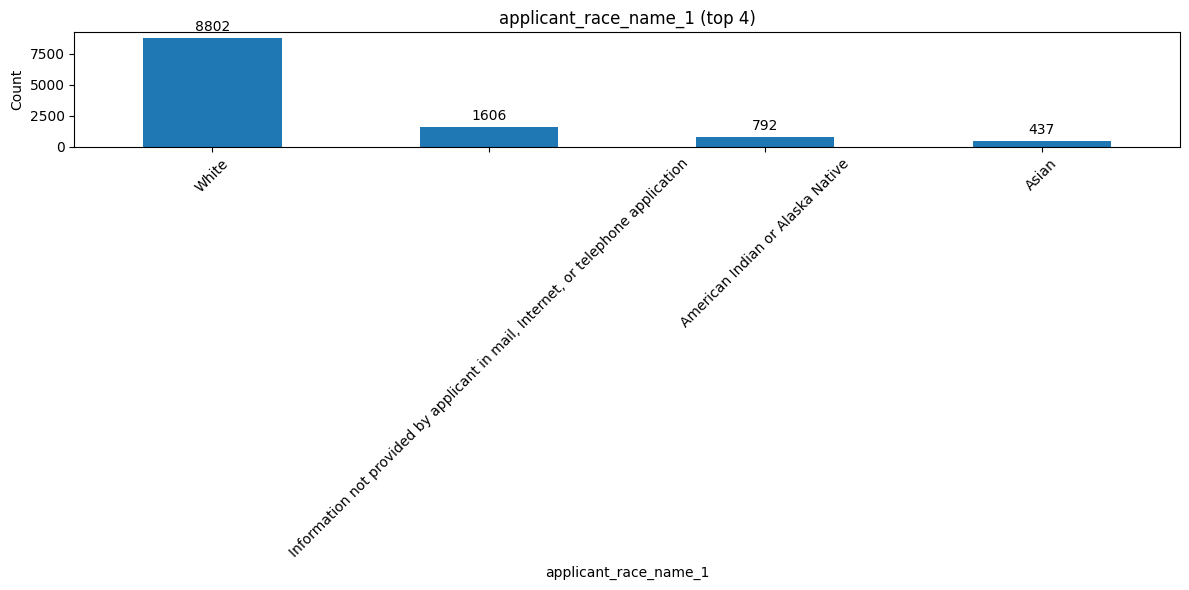

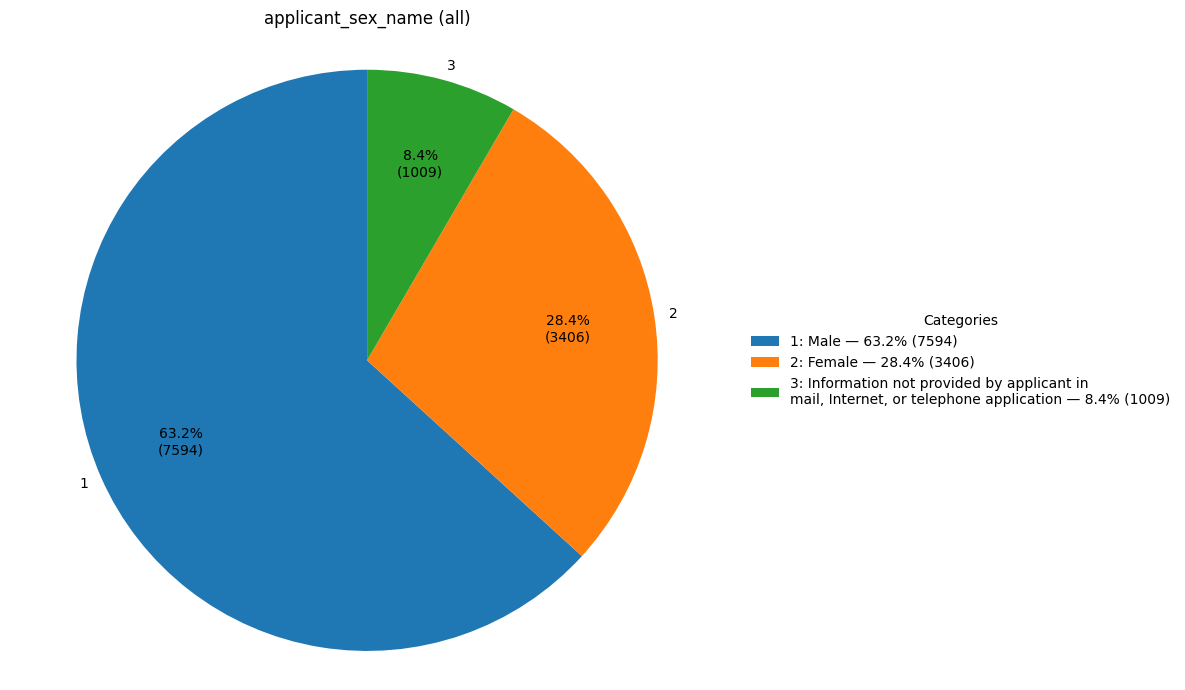

In [38]:
visualize_data(df,"categorical", top_n=4)

## Summary and Interpretation

Final analysis examining the relationship between loan amount and applicant income.

### Relationship Between Loan Amount and Applicant Income

Create a scatter plot to visualize the relationship between loan amount and applicant income, helping to identify the correlation strength and any patterns or outliers in the loan-to-income relationship.

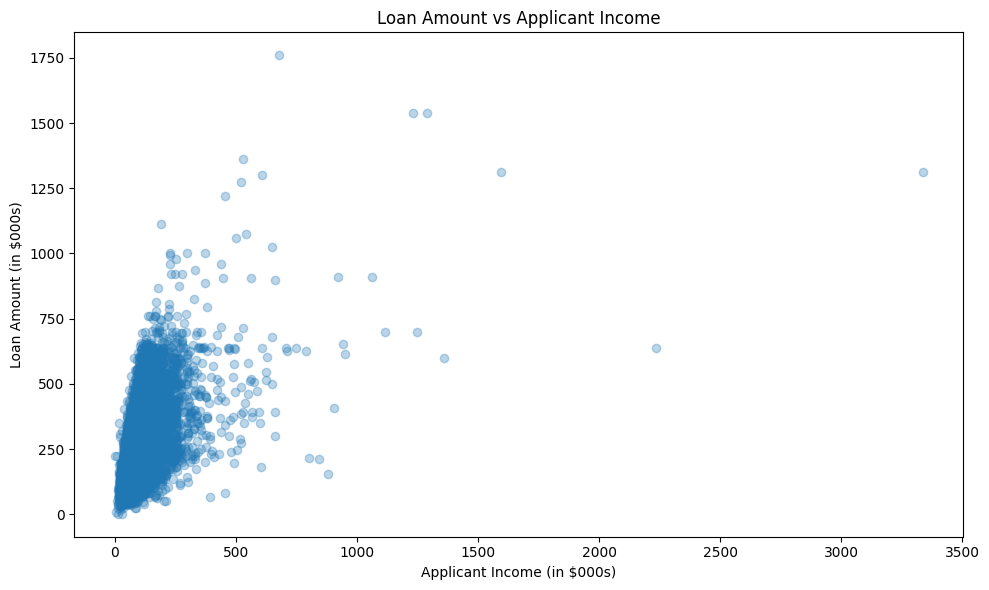

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df["applicant_income_000s"], df["loan_amount_000s"], alpha=0.3)
plt.title("Loan Amount vs Applicant Income")
plt.xlabel("Applicant Income (in $000s)")
plt.ylabel("Loan Amount (in $000s)")
plt.tight_layout()
plt.show()

## Scatter plot: Loan amount vs applicant income

Create a scatter plot of **`loan_amount_000s`** against **`applicant_income_000s`** to visually assess the relationship between income and loan size. The plot shows a clear upward trend (higher incomes generally align with higher loan amounts), along with noticeable right-tail outliers in both income and loan amount that may warrant additional views (e.g., log scale or axis limits) for clearer interpretation of the main cluster.

## Summary and Interpretation

### What was learned from the dataset
The cleaned HMDA 2017 Alaska dataset provides a structured view of originated first-lien, owner-occupied mortgage loans, including applicant income, loan amount, and several categorical descriptors (loan purpose, loan type, geography, preapproval status, purchaser type, and borrower demographics). After cleaning, the focused dataset contained **12,009 records and 11 columns**, with numeric fields ready for analysis and categorical fields well-suited for grouped comparisons.

### Interesting patterns and insights
- **Income and loan amount move together:** The correlation between `applicant_income_000s` and `loan_amount_000s` is **moderately positive (~0.53)**, and the scatter plot shows a clear upward relationship.
- **Right-skew and outliers:** Both income and loan amount distributions are right-skewed with notable high-end outliers, which influence means and can visually compress the main cluster in plots.
- **Loan purpose differences:** *Home purchase* loans have the highest average loan amount and the largest loan–income gap, while *home improvement* is consistently lower across averages.
- **Loan type differences:** *VA-guaranteed* loans show the highest average loan amount and largest loan–income gap, while *FSA/RHS-guaranteed* is lowest on both income and loan amount.
- **Geographic concentration:** Loan volume is highly concentrated in *Anchorage Municipality*, and the MSA comparison suggests *Anchorage - AK* has higher average income and loan amounts than *Fairbanks - AK*.
- **Borrower-field completeness signal:** Categories like “Information not provided…” appear in ethnicity/race fields, which is informative for assessing reliability and potential reporting gaps rather than true demographic composition.

### Limitations and assumptions
- **Originations only:** The selected extract includes originated loans, so denial-related fields are empty and outcomes like approval/denial cannot be analyzed.
- **MSA/MD missingness is structural:** `msamd_name` is missing for many records because they are outside defined MSAs/MDs; missing values were treated as a “Non-MSA/MD” group rather than dropped.
- **Means can be sensitive to outliers:** Extreme values in income and loan amounts can inflate averages; medians and robust views (e.g., trimmed ranges) may better represent the typical case.
- **Income and loan amounts are in thousands:** Both numeric measures are interpreted in **$000s**; comparisons use the same unit scale.

### Anything surprising or unclear
- A sizable share of records fall into “Information not provided…” categories for some borrower demographics, which limits demographic interpretation and suggests cautious use of these fields for subgroup conclusions.
- The wide ranges (e.g., very high reported incomes and loan amounts) highlight the importance of validating outliers and potentially using log-scale or capped plots to better visualize the majority of observations.